This Notebook covers the web scraping and the exploratory data analysis. The sample of the output dataset named "Full_data" has been uploaded.

In [135]:
# import the necessnary libs
import pandas as pd
import numpy as np
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
import urllib
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split

In [136]:
import requests
URL = 'https://racing.hkjc.com/racing/information/English/Racing/ResultsAll.aspx?RaceDate=2010/09/05'
page = requests.get('https://racing.hkjc.com/racing/information/chinese/Racing/ResultsAll.aspx?RaceDate=2010/09/05')

In [137]:
# Solve the math game in the web page
from math import cos, pi, floor

import requests

def parse_challenge(page):
    """
    Parse a challenge given by mmi and mavat's web servers, forcing us to solve
    some math stuff and send the result as a header to actually get the page.
    This logic is pretty much copied from https://github.com/R3dy/jigsaw-rails/blob/master/lib/breakbot.rb
    """
    top = page.split('<script>')[1].split('\n')
    challenge = top[1].split(';')[0].split('=')[1]
    challenge_id = top[2].split(';')[0].split('=')[1]
    return {'challenge': challenge, 'challenge_id': challenge_id, 'challenge_result': get_challenge_answer(challenge)}


def get_challenge_answer(challenge):
    """
    Solve the math part of the challenge and get the result
    """
    arr = list(challenge)
    last_digit = int(arr[-1])
    arr.sort()
    min_digit = int(arr[0])
    subvar1 = (2 * int(arr[2])) + int(arr[1])
    subvar2 = str(2 * int(arr[2])) + arr[1]
    power = ((int(arr[0]) * 1) + 2) ** int(arr[1])
    x = (int(challenge) * 3 + subvar1)
    y = cos(pi * subvar1)
    answer = x * y
    answer -= power
    answer += (min_digit - last_digit)
    answer = str(int(floor(answer))) + subvar2
    return answer


def getPage(URL):
  if __name__ == '__main__':
    s = requests.Session()
    r = s.get(URL)

    if 'X-AA-Challenge' in r.text:
        challenge = parse_challenge(r.text)
        r = s.get(URL, headers={
            'X-AA-Challenge': challenge['challenge'],
            'X-AA-Challenge-ID': challenge['challenge_id'],
            'X-AA-Challenge-Result': challenge['challenge_result']
        })

        yum = r.cookies
        r = s.get(URL, cookies=yum)

    return r

In [138]:
import requests, re
from bs4 import BeautifulSoup
from urllib.parse import urljoin

table_source = "https://racing.hkjc.com/racing/information/English/Horse/HorseFormerName.aspx"
start_url = "https://racing.hkjc.com"

page = getPage(table_source)

In [139]:
# Extract the Link regarding the information of each horse
horse_info_links = []
soup = BeautifulSoup(page.text, 'html.parser')
table = BeautifulSoup(str(soup.find_all(class_='bigborder')))
links = table.find_all('a', href=re.compile("HorseId="))
for item in links:
    horse_info_links.append(urljoin(start_url, item['href']))
print(horse_info_links)
URL = horse_info_links[0]
name=URL.split("=")[1].split("_", 1)[1]
print(name)

['https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H037', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H342', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2020_E144', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H331', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2021_G196', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2023_J181', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H046', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H076', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2023_J328', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H082', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK

In [140]:
def horse_df(URL):
  name=URL.split("=")[1].split("_", 1)[1]
  page = getPage(URL)
  soup = BeautifulSoup(page.text, 'html.parser')
  table = soup.find_all(class_='bigborder')
  df = pd.read_html(str(table))

  df=df[0]
  df.columns=df.iloc[0]
  df=df.drop(0)
  df=df.drop(columns='Video Replay')
  df['horse']=name

  df['season']=0
  for ind in range(len(df)):
    ind=ind+1
    if (df['G'][ind] == df['Dist.'][ind]):
      c = df['G'][ind][:5]
    df['season'][ind]=c
  df['N_RaceIndex']=df['season']+"_"+df['Race Index']

  for ind in range(len(df)):
    ind=ind+1
    if (df['G'][ind] == df['Dist.'][ind]):
      df['G'][ind]="NaN"
  indexNames = df[ df['G'] == "NaN" ].index
  df.drop(indexNames , inplace=True)
  return df


In [141]:
display(horse_df(URL))

,Race Index,Pla.,Date,RC/Track/ Course,Dist.,G,Race Class,Dr.,Rtg.,Trainer,...,LBW,Win Odds,Act. Wt.,Running Position,Finish Time,Declar. Horse Wt.,Gear,horse,season,N_RaceIndex
2,521,05,20/03/24,"HV / Turf / ""C+3""",1200,G,3,6,72,J Size,...,1-1/2,18,129,8 8 5,1.10.16,1081,B,2022_H037,23/24,23/24_521
3,463,03,28/02/24,"HV / Turf / ""A""",1200,G,3,2,72,J Size,...,2,6.2,128,8 7 3,1.10.98,1078,B,2022_H037,23/24,23/24_463
4,422,01,15/02/24,"HV / Turf / ""C""",1200,G,3,11,67,J Size,...,HD,5.2,127,9 9 1,1.10.51,1075,B,2022_H037,23/24,23/24_422
5,386,04,31/01/24,"HV / Turf / ""A""",1200,G,3,8,68,J Size,...,2-3/4,14,123,10 9 4,1.10.18,1083,B,2022_H037,23/24,23/24_386
6,332,03,10/01/24,"HV / Turf / ""B""",1200,G,3,3,68,J Size,...,2-1/2,7.3,126,11 10 3,1.10.30,1074,B1,2022_H037,23/24,23/24_332
7,295,07,29/12/23,"HV / Turf / ""C+3""",1200,G,3,7,68,J Size,...,2,4.8,125,10 10 7,1.10.54,1095,--,2022_H037,23/24,23/24_295
8,250,03,13/12/23,"HV / Turf / ""B""",1200,G,3,6,68,J Size,...,1-1/4,4.1,125,10 10 3,1.10.18,1080,--,2022_H037,23/24,23/24_250
9,194,02,22/11/23,"HV / Turf / ""C""",1200,G,3,6,66,J Size,...,N,14,122,9 11 2,1.10.16,1083,--,2022_H037,23/24,23/24_194
10,153,01,08/11/23,"HV / Turf / ""A""",1200,G,4,4,60,J Size,...,3/4,2.4,135,7 7 1,1.09.61,1067,--,2022_H037,23/24,23/24_153
11,093,04,18/10/23,"HV / Turf / ""B""",1000,GY,4,5,60,J Size,...,1-3/4,13,135,10 11 4,0.57.75,1075,--,2022_H037,23/24,23/24_093


In [142]:
print(horse_info_links)

['https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H037', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H342', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2020_E144', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H331', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2021_G196', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2023_J181', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H046', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H076', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2023_J328', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2022_H082', 'https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK

In [143]:
# read tables of all horses using the hourses_id extracted eariler (debug)
df_list = []
import warnings
from time import time
warnings.filterwarnings("ignore")
start_time = time()
for link in horse_info_links:
    try:
        df = horse_df(link)
        if df is not None and not df.empty:
            df_list.append(df)
        else:
            print(f"No data returned for {link}")
    except Exception as e:
        print(f"Error processing {link}: {e}")
    print(f"Progress: {len(df_list)}/{len(horse_info_links)}")
    print(f"Time used: {time() - start_time}")
    print("=" * 20)


Progress: 1/1230
Time used: 0.7019431591033936
Progress: 2/1230
Time used: 1.8536300659179688
Progress: 3/1230
Time used: 2.5703670978546143
Progress: 4/1230
Time used: 3.320441961288452
Progress: 5/1230
Time used: 4.016861915588379
Progress: 6/1230
Time used: 4.699751853942871
Progress: 7/1230
Time used: 5.486883163452148
Progress: 8/1230
Time used: 6.208716154098511
No data returned for https://racing.hkjc.com/racing/information/English/Horse/Horse.aspx?HorseId=HK_2023_J328
Progress: 8/1230
Time used: 6.863982200622559
Progress: 9/1230
Time used: 7.638660907745361
Progress: 10/1230
Time used: 8.706019163131714
Progress: 11/1230
Time used: 9.467305898666382
Progress: 12/1230
Time used: 10.940837860107422
Progress: 13/1230
Time used: 11.661527156829834
Progress: 14/1230
Time used: 12.372236013412476
Progress: 15/1230
Time used: 13.108360052108765
Progress: 16/1230
Time used: 13.826678037643433
Progress: 17/1230
Time used: 14.57909607887268


KeyboardInterrupt: 

In [144]:
# read tables of all horses using the hourses_id extracted eariler V2
import concurrent.futures
import pandas as pd
import warnings
from time import time

warnings.filterwarnings("ignore")

# Assuming horse_df is a function that takes a link and returns a DataFrame

def process_link(link):
    try:
        df = horse_df(link)
        return df
    except Exception as e:
        print(f"Error processing link {link}: {e}")
        return None

def main(horse_info_links):
    start_time = time()
    df_list = []

    # Using ThreadPoolExecutor to parallelize I/O bound tasks
    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        futures = [executor.submit(process_link, link) for link in horse_info_links]
        for i, future in enumerate(concurrent.futures.as_completed(futures)):
            result = future.result()
            if result is not None:
                df_list.append(result)
            print(f"Progress: {i+1}/{len(horse_info_links)}")
            print(f"Time used: {time() - start_time}")
            print("=" * 20)

    result_df = pd.concat(df_list, ignore_index=True)
    return result_df

# Replace horse_info_links with your list of links
result_df = main(horse_info_links)



Progress: 1/1230
Time used: 0.7772629261016846
Progress: 2/1230
Time used: 1.4061470031738281
Progress: 3/1230
Time used: 1.4169881343841553
Progress: 4/1230
Time used: 1.420747995376587
Progress: 5/1230
Time used: 1.4278059005737305
Progress: 6/1230
Time used: 1.4425818920135498
Progress: 7/1230
Time used: 1.4475538730621338
Progress: 8/1230
Time used: 1.4523251056671143
Progress: 9/1230
Time used: 1.4577598571777344
Progress: 10/1230
Time used: 1.462143898010254
Progress: 11/1230
Time used: 1.6740550994873047
Progress: 12/1230
Time used: 2.0901248455047607
Progress: 13/1230
Time used: 2.4407310485839844
Progress: 14/1230
Time used: 2.453472852706909
Progress: 15/1230
Time used: 2.4606690406799316
Progress: 16/1230
Time used: 2.468247890472412
Progress: 17/1230
Time used: 2.472675085067749
Progress: 18/1230
Time used: 2.4821999073028564
Progress: 19/1230
Time used: 2.487231969833374
Progress: 20/1230
Time used: 2.4915900230407715
Progress: 21/1230
Time used: 2.4964089393615723
Progres

In [147]:
# read tables of all horses using the hourses_id extracted eariler V3

def main(horse_info_links):
    start_time = time()
    df_list = []
    batch_size = 10  # Adjust as needed

    with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
        for i in range(0, len(horse_info_links), batch_size):
            batch_links = horse_info_links[i:i + batch_size]
            futures = [executor.submit(process_link, link) for link in batch_links]
            for future in concurrent.futures.as_completed(futures):
                result = future.result()
                if result is not None:
                    df_list.append(result)

            print(f"Progress: {i+1}/{len(horse_info_links)}")
            print(f"Time used: {time() - start_time}")
            print("=" * 20)

    result_df = pd.concat(df_list, ignore_index=True)
    return result_df



In [145]:
result.to_csv("horse_info_V3.csv")
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13776 entries, 0 to 13775
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Race Index         13776 non-null  object
 1   Pla.               13776 non-null  object
 2   Date               13776 non-null  object
 3   RC/Track/ Course   13776 non-null  object
 4   Dist.              13776 non-null  object
 5   G                  13776 non-null  object
 6   Race Class         13776 non-null  object
 7   Dr.                13776 non-null  object
 8   Rtg.               13776 non-null  object
 9   Trainer            13776 non-null  object
 10  Jockey             13764 non-null  object
 11  LBW                13776 non-null  object
 12  Win Odds           13776 non-null  object
 13  Act. Wt.           13776 non-null  object
 14  Running Position   13776 non-null  object
 15  Finish Time        13776 non-null  object
 16  Declar. Horse Wt.  13776 non-null  objec

# Data Preprocessing

## Load horse_info

In [148]:
### Load data
horse_info = pd.read_csv("horse_info.csv")
horse_info

,Unnamed: 0,Race Index,Pla.,Date,RC/Track/ Course,Dist.,G,Race Class,Dr.,Rtg.,...,LBW,Win Odds,Act. Wt.,Running Position,Finish Time,Declar. Horse Wt.,Gear,horse,season,N_RaceIndex
0,0,521,05,20/03/24,"HV / Turf / ""C+3""",1200,G,3,6,72,...,1-1/2,18,129,8 8 5,1.10.16,1081,B,2022_H037,23/24,23/24_521
1,1,463,03,28/02/24,"HV / Turf / ""A""",1200,G,3,2,72,...,2,6.2,128,8 7 3,1.10.98,1078,B,2022_H037,23/24,23/24_463
2,2,422,01,15/02/24,"HV / Turf / ""C""",1200,G,3,11,67,...,HD,5.2,127,9 9 1,1.10.51,1075,B,2022_H037,23/24,23/24_422
3,3,386,04,31/01/24,"HV / Turf / ""A""",1200,G,3,8,68,...,2-3/4,14,123,10 9 4,1.10.18,1083,B,2022_H037,23/24,23/24_386
4,4,332,03,10/01/24,"HV / Turf / ""B""",1200,G,3,3,68,...,2-1/2,7.3,126,11 10 3,1.10.30,1074,B1,2022_H037,23/24,23/24_332
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,13771,090,09,15/10/23,"ST / Turf / ""A+3""",1400,G,3,2,62,...,6-1/4,90,118,6 7 8 9,1.22.13,1138,B-/SR1/XB1,2021_G131,23/24,23/24_090
13772,13772,515,05,20/03/22,"ST / Turf / ""A""",1600,G,3,7,66,...,2-3/4,9,121,5 5 5 5,1.35.00,1135,B,2021_G131,21/22,21/22_515
13773,13773,442,02,20/02/22,"ST / Turf / ""A""",1600,Y,3,5,64,...,N,24,117,5 5 5 2,1.38.37,1137,B1,2021_G131,21/22,21/22_442
13774,13774,382,08,30/01/22,"ST / Turf / ""A+3""",1600,G,3,11,66,...,2-1/2,21,118,10 10 8 8,1.35.39,1138,--,2021_G131,21/22,21/22_382


In [149]:

column_names = df.columns
print(column_names)

Index(['Race Index', 'Pla.', 'Date', 'RC/Track/ Course', 'Dist.', 'G',
       'Race Class', 'Dr.', 'Rtg.', 'Trainer', 'Jockey', 'LBW', 'Win Odds',
       'Act. Wt.', 'Running Position', 'Finish Time', 'Declar. Horse Wt.',
       'Gear', 'horse', 'season', 'N_RaceIndex'],
      dtype='object', name=0)


We drop features that cannot be obtained before the game, like "running position", "LBW" refering the difference in distance of the horse with the winning horse. Some of the non-numeric data like Gear is converted to number of gear.

In [157]:
# We define a function to do basic preprocessing for data exploration

def time_map(org_time):
    splited_time = org_time.split(".")
    calculated_time = int(splited_time[0])*60*100 + int(splited_time[1])*100 + int(splited_time[2])
    return calculated_time

def horse_info_preprocess(df):
    df['RC'] = df['RC/Track/ Course'].str.split("/", expand=True)[0]
    df['Track'] = df['RC/Track/ Course'].str.split("/", expand=True)[1]
    df['Course'] = df['RC/Track/ Course'].str.split("/", expand=True)[2]
    df.drop([df.columns[0],"Race Index", "RC/Track/ Course", "Running Position", "Date", "LBW","season"], axis=1, inplace=True)
    
    #df.drop(["Pla.","N_RaceIndex"], axis=1, inplace=True)
    
    df.replace("--", np.NaN, inplace=True)
    df = df[df['Finish Time'].notna()]
    df["Gear"].fillna("None")
    df['NoofGear']=0
    for ind in df.index:
      if (df['Gear'][ind]!='NaN'):
        try:
          df['NoofGear'][ind]=len(df['Gear'][ind])
        except:
          continue

    df[["Win Odds", "Declar. Horse Wt.","Rtg.","Dr."]] = df[["Win Odds", "Declar. Horse Wt.","Rtg.","Dr."]].apply(pd.to_numeric)
    
    df["Finish Time"] = df["Finish Time"].map(time_map)

    return df

In [ ]:
# Assuming df is your DataFrame
df = horse_info_preprocess(df)
column_names = df.columns
print(column_names)


In [158]:
horse_info_processed1=horse_info_preprocess(horse_info)

In [159]:
horse_info_processed1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13549 entries, 0 to 13775
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Pla.               13549 non-null  object 
 1   Dist.              13549 non-null  int64  
 2   G                  13549 non-null  object 
 3   Race Class         13549 non-null  object 
 4   Dr.                13549 non-null  int64  
 5   Rtg.               13489 non-null  float64
 6   Trainer            13549 non-null  object 
 7   Jockey             13549 non-null  object 
 8   Win Odds           13548 non-null  float64
 9   Act. Wt.           13549 non-null  int64  
 10  Finish Time        13549 non-null  int64  
 11  Declar. Horse Wt.  13539 non-null  float64
 12  Gear               11247 non-null  object 
 13  horse              13549 non-null  object 
 14  N_RaceIndex        13549 non-null  object 
 15  RC                 13549 non-null  object 
 16  Track              13549 no

In [160]:
for i in horse_info_processed1.columns:
  try:
    print("------------",i,"------------")
    print(horse_info_processed1[i].describe())
  except:
    continue

------------ Pla. ------------
count     13549
unique       14
top          01
freq       1428
Name: Pla., dtype: object
------------ Dist. ------------
count    13549.000000
mean      1378.322385
std        269.854520
min       1000.000000
25%       1200.000000
50%       1200.000000
75%       1600.000000
max       2400.000000
Name: Dist., dtype: float64
------------ G ------------
count     13549
unique       11
top           G
freq      10068
Name: G, dtype: object
------------ Race Class ------------
count     13549
unique       13
top           4
freq       6105
Name: Race Class, dtype: object
------------ Dr. ------------
count    13549.000000
mean         6.664994
std          3.669434
min          1.000000
25%          4.000000
50%          7.000000
75%         10.000000
max         14.000000
Name: Dr., dtype: float64
------------ Rtg. ------------
count    13489.000000
mean        59.828749
std         17.260998
min         10.000000
25%         49.000000
50%         58.000000


From the statistics, we want to investigate the distribution of the non-numeric features like "Trainer", "Jockey", "Gear", "Track", "G" and "RC"

### Distribution Chart

<Axes: title={'center': 'Distribution of Trainer'}, xlabel='Trainer'>

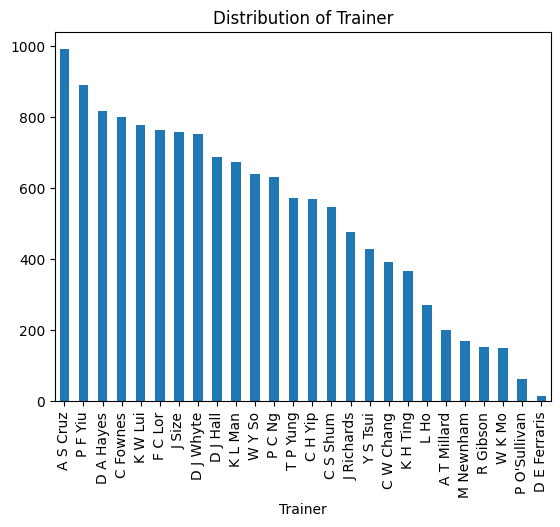

In [161]:
horse_info_processed1["Trainer"].value_counts().plot(kind="bar",title="Distribution of Trainer")

<Axes: title={'center': 'Distribution of Jockey'}, xlabel='Jockey'>

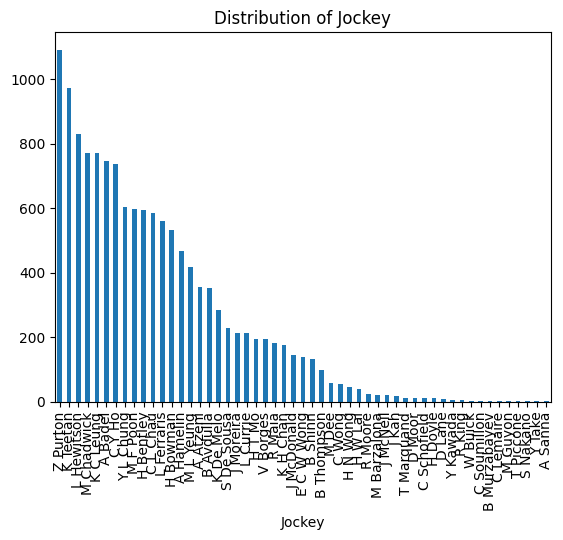

In [162]:
horse_info_processed1["Jockey"].value_counts().plot(kind="bar",title="Distribution of Jockey")

We can see there are large number of unique trainer and jockey which make one-hot encoding impossible

<Axes: title={'center': 'Distribution of Number of Gear'}, xlabel='NoofGear'>

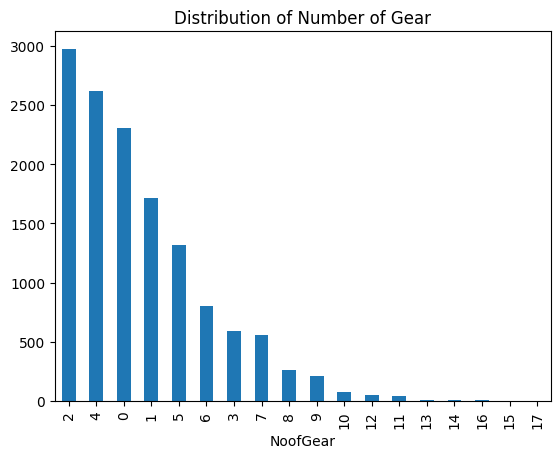

In [163]:
horse_info_processed1["NoofGear"].value_counts().plot(kind="bar",title="Distribution of Number of Gear")

Track
 Turf     12414
 AWT       1125
 Turf         8
 Sand         2
Name: count, dtype: int64

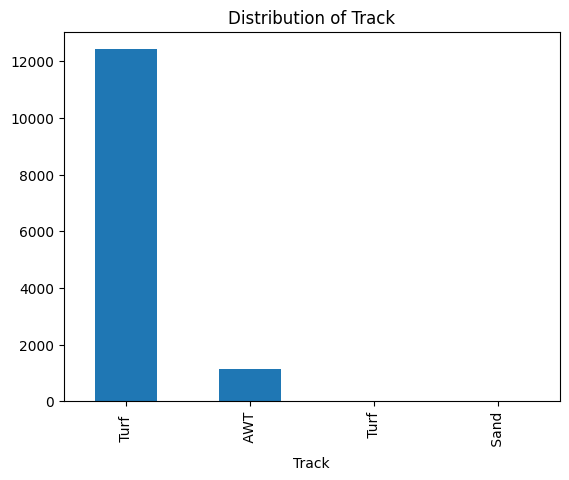

In [164]:
horse_info_processed1["Track"].value_counts().plot(kind="bar",title="Distribution of Track")
horse_info_processed1["Track"].value_counts()

G
G     10068
GF     1624
GD     1013
GY      379
Y       227
WS       83
S        81
YS       24
H        19
WF       16
FT       15
Name: count, dtype: int64

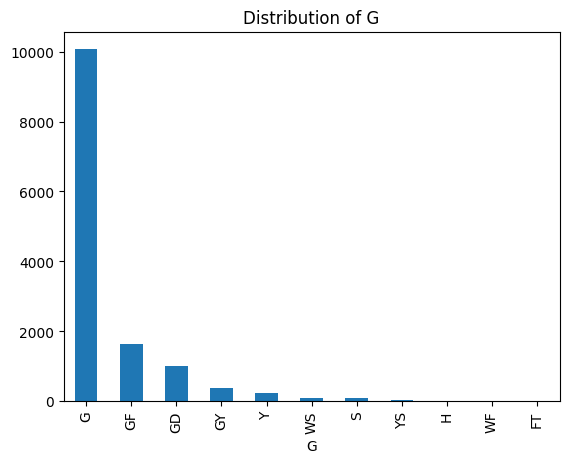

In [165]:
horse_info_processed1["G"].value_counts().plot(kind="bar",title="Distribution of G")
horse_info_processed1["G"].value_counts()

RC
ST                8339
HV                5200
Meydan               4
Seoul                2
Moonee Valley        1
Flemington           1
Al Rayyan            1
Chukyo               1
Name: count, dtype: int64

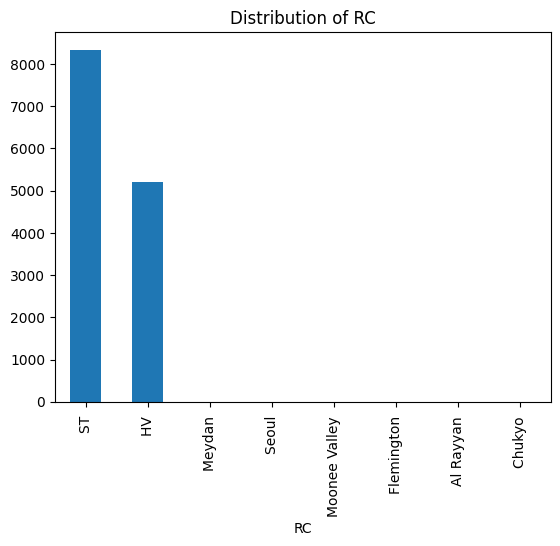

In [166]:
horse_info_processed1["RC"].value_counts().plot(kind="bar",title="Distribution of RC")
horse_info_processed1["RC"].value_counts()

<Axes: title={'center': 'Distribution of Course'}, xlabel='Course'>

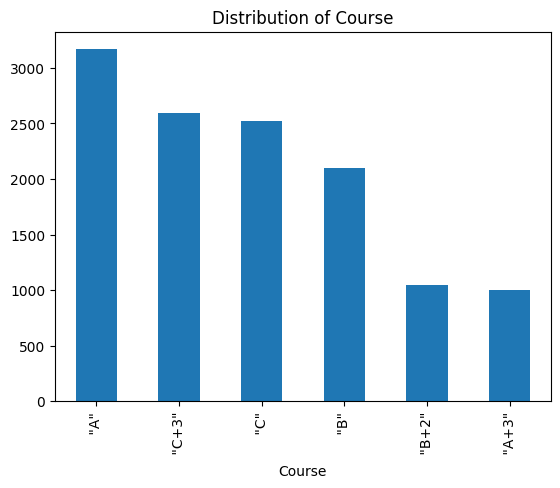

In [167]:
horse_info_processed1["Course"].value_counts().plot(kind="bar",title="Distribution of Course")

Race Class
4          6105
3          4524
5          1287
2           944
G1          124
G3          122
1           120
4YO          92
G2           88
GRIFFIN      60
4R           57
3R           25
QA G1         1
Name: count, dtype: int64

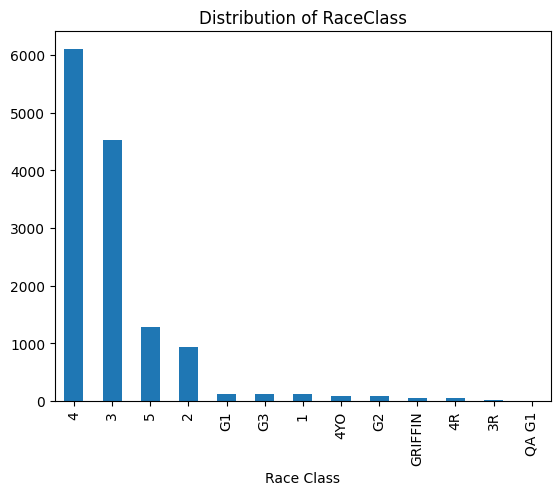

In [168]:
horse_info_processed1["Race Class"].value_counts().plot(kind="bar",title="Distribution of RaceClass")
horse_info_processed1["Race Class"].value_counts()

The following preprocess will be carried out:

1. remove data which contains special entries, e.g {Kranji, Seoul} in 'RC', {'MY'} in 'G', {Turf, Sand} in 'Track',{'SIN G1','KOR G1','R'} in RaceClass
2. One hot encoding for the columns with reasonable number of options: ['G','RaceClass','RC','Track','Course']
3. Drop:['Trainer','Jockey']

In [169]:
horse_info_processed1[horse_info_processed1.RC.str.contains('Kranji|Seoul')]

,Pla.,Dist.,G,Race Class,Dr.,Rtg.,Trainer,Jockey,Win Odds,Act. Wt.,Finish Time,Declar. Horse Wt.,Gear,horse,N_RaceIndex,RC,Track,Course,NoofGear
539,09,1800,GD,G3,13,90.0,P C Ng,D Lane,20.0,126,11520,NaN,BO-/XB/PC1,2019_D433,23/24_Overseas,Seoul,Sand,None,10
3054,04,1200,GD,G3,11,113.0,P C Ng,D Lane,11.0,126,7160,NaN,V-/PC1,2018_C188,23/24_Overseas,Seoul,Sand,None,6


In [170]:
horse_info_processed1[horse_info_processed1['Race Class']=='R']

,Pla.,Dist.,G,Race Class,Dr.,Rtg.,Trainer,Jockey,Win Odds,Act. Wt.,Finish Time,Declar. Horse Wt.,Gear,horse,N_RaceIndex,RC,Track,Course,NoofGear


In [183]:
#final preprocess on horse_info
def horse_info_final_preprocess(df):
    df = df[~df.RC.str.contains('Kranji|Seoul')]
    df = df[df['Race Class'] != 'R']
    df = pd.get_dummies(df,columns=['G','Race Class','RC','Track','Course'])
    df.drop(["Trainer", "Jockey"], axis=1, inplace=True)

    return df

In [184]:
display(horse_info_processed1)

,Pla.,Dist.,G,Race Class,Dr.,Rtg.,Trainer,Jockey,Win Odds,Act. Wt.,Finish Time,Declar. Horse Wt.,Gear,horse,N_RaceIndex,RC,Track,Course,NoofGear
0,05,1200,G,3,6,72.0,J Size,A Hamelin,18.0,129,7016,1081.0,B,2022_H037,23/24_521,HV,Turf,"""C+3""",1
1,03,1200,G,3,2,72.0,J Size,A Hamelin,6.2,128,7098,1078.0,B,2022_H037,23/24_463,HV,Turf,"""A""",1
2,01,1200,G,3,11,67.0,J Size,Z Purton,5.2,127,7051,1075.0,B,2022_H037,23/24_422,HV,Turf,"""C""",1
3,04,1200,G,3,8,68.0,J Size,M F Poon,14.0,123,7018,1083.0,B,2022_H037,23/24_386,HV,Turf,"""A""",1
4,03,1200,G,3,3,68.0,J Size,A Atzeni,7.3,126,7030,1074.0,B1,2022_H037,23/24_332,HV,Turf,"""B""",2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,09,1400,G,3,2,62.0,D J Whyte,A Atzeni,90.0,118,8213,1138.0,B-/SR1/XB1,2021_G131,23/24_090,ST,Turf,"""A+3""",10
13772,05,1600,G,3,7,66.0,D J Whyte,A Badel,9.0,121,9500,1135.0,B,2021_G131,21/22_515,ST,Turf,"""A""",1
13773,02,1600,Y,3,5,64.0,D J Whyte,L Hewitson,24.0,117,9837,1137.0,B1,2021_G131,21/22_442,ST,Turf,"""A""",2
13774,08,1600,G,3,11,66.0,D J Whyte,C L Chau,21.0,118,9539,1138.0,NaN,2021_G131,21/22_382,ST,Turf,"""A+3""",0


In [185]:
horse_info_final=horse_info_final_preprocess(horse_info_processed1)

In [186]:
horse_info_final

,Pla.,Dist.,Dr.,Rtg.,Win Odds,Act. Wt.,Finish Time,Declar. Horse Wt.,Gear,horse,...,RC_ST,Track_ AWT,Track_ Turf,Track_ Turf,"Course_ ""A""","Course_ ""A+3""","Course_ ""B""","Course_ ""B+2""","Course_ ""C""","Course_ ""C+3"""
0,05,1200,6,72.0,18.0,129,7016,1081.0,B,2022_H037,...,False,False,False,True,False,False,False,False,False,True
1,03,1200,2,72.0,6.2,128,7098,1078.0,B,2022_H037,...,False,False,False,True,True,False,False,False,False,False
2,01,1200,11,67.0,5.2,127,7051,1075.0,B,2022_H037,...,False,False,False,True,False,False,False,False,True,False
3,04,1200,8,68.0,14.0,123,7018,1083.0,B,2022_H037,...,False,False,False,True,True,False,False,False,False,False
4,03,1200,3,68.0,7.3,126,7030,1074.0,B1,2022_H037,...,False,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13771,09,1400,2,62.0,90.0,118,8213,1138.0,B-/SR1/XB1,2021_G131,...,True,False,False,True,False,True,False,False,False,False
13772,05,1600,7,66.0,9.0,121,9500,1135.0,B,2021_G131,...,True,False,False,True,True,False,False,False,False,False
13773,02,1600,5,64.0,24.0,117,9837,1137.0,B1,2021_G131,...,True,False,False,True,True,False,False,False,False,False
13774,08,1600,11,66.0,21.0,118,9539,1138.0,NaN,2021_G131,...,True,False,False,True,False,True,False,False,False,False


## Load horse_family

In [196]:
# Extract the Link regarding the information of each horse
horse_info_links = []
soup = BeautifulSoup(page.text, 'html.parser')
table = BeautifulSoup(str(soup.find_all(class_='horseProfile')))
links = table.find_all('a', href=re.compile("HorseId="))
for item in links:
    horse_info_links.append(urljoin(start_url, item['href']))
print(horse_info_links)
URL = horse_info_links[0]
name=URL.split("=")[1].split("_", 1)[1]
print(name)

[]


IndexError: list index out of range

In [ ]:
def horse_df(URL):
  name=URL.split("=")[1].split("_", 1)[1]
  page = getPage(URL)
  soup = BeautifulSoup(page.text, 'html.parser')
  table = soup.find_all(class_='horseProfile')
  df = pd.read_html(str(table))

  df=df[0]
  df.columns=df.iloc[0]
  df=df.drop(0)
  #df=df.drop(columns='VideoReplay')
  df['horse']=name

  df['season']=0
  for ind in range(len(df)):
    ind=ind+1
    if (df['G'][ind] == df['Dist.'][ind]):
      c = df['G'][ind][:5]
    df['season'][ind]=c
  df['N_RaceIndex']=df['season']+"_"+df['RaceIndex']

  for ind in range(len(df)):
    ind=ind+1
    if (df['G'][ind] == df['Dist.'][ind]):
      df['G'][ind]="NaN"
  indexNames = df[ df['G'] == "NaN" ].index
  df.drop(indexNames , inplace=True)
  return df

In [ ]:
# read tables of all horses using the hourses_id extracted eariler
df_list = []
import warnings
from time import time
warnings.filterwarnings("ignore")
start_time = time()
for link in horse_info_links:
    try:
        df = horse_df(link)
        df_list.append(df)
    except:
        continue
    print(f"Progress: {len(df_list)}/{len(horse_info_links)}")
    print(f"Time used: {time() - start_time}")
    print("=" * 20)

result = pd.concat(df_list)
result = result.reset_index(drop=True)

In [192]:
horse_family = pd.read_csv("drive/MyDrive/COMP3359 Project/horse_family.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'drive/MyDrive/COMP3359 Project/horse_family.csv'

In [188]:
horse_family.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13776 entries, 0 to 13775
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         13776 non-null  int64 
 1   Race Index         13776 non-null  object
 2   Pla.               13776 non-null  object
 3   Date               13776 non-null  object
 4   RC/Track/ Course   13776 non-null  object
 5   Dist.              13776 non-null  int64 
 6   G                  13776 non-null  object
 7   Race Class         13776 non-null  object
 8   Dr.                13776 non-null  object
 9   Rtg.               13776 non-null  object
 10  Trainer            13776 non-null  object
 11  Jockey             13764 non-null  object
 12  LBW                13776 non-null  object
 13  Win Odds           13776 non-null  object
 14  Act. Wt.           13776 non-null  int64 
 15  Running Position   13776 non-null  object
 16  Finish Time        13776 non-null  objec

In [189]:
horse_family.head()

,Unnamed: 0,Race Index,Pla.,Date,RC/Track/ Course,Dist.,G,Race Class,Dr.,Rtg.,...,LBW,Win Odds,Act. Wt.,Running Position,Finish Time,Declar. Horse Wt.,Gear,horse,season,N_RaceIndex
0,0,521,05,20/03/24,"HV / Turf / ""C+3""",1200,G,3,6,72,...,1-1/2,18,129,8 8 5,1.10.16,1081,B,2022_H037,23/24,23/24_521
1,1,463,03,28/02/24,"HV / Turf / ""A""",1200,G,3,2,72,...,2,6.2,128,8 7 3,1.10.98,1078,B,2022_H037,23/24,23/24_463
2,2,422,01,15/02/24,"HV / Turf / ""C""",1200,G,3,11,67,...,HD,5.2,127,9 9 1,1.10.51,1075,B,2022_H037,23/24,23/24_422
3,3,386,04,31/01/24,"HV / Turf / ""A""",1200,G,3,8,68,...,2-3/4,14,123,10 9 4,1.10.18,1083,B,2022_H037,23/24,23/24_386
4,4,332,03,10/01/24,"HV / Turf / ""B""",1200,G,3,3,68,...,2-1/2,7.3,126,11 10 3,1.10.30,1074,B1,2022_H037,23/24,23/24_332


### Chart and Statistics

In [190]:
for i in horse_family.columns:
  try:
    print("------------",i,"------------")
    print(horse_family[i].describe())
  except:
    continue

------------ Unnamed: 0 ------------
count    13776.000000
mean      6887.500000
std       3976.932989
min          0.000000
25%       3443.750000
50%       6887.500000
75%      10331.250000
max      13775.000000
Name: Unnamed: 0, dtype: float64
------------ Race Index ------------
count     13776
unique      838
top         449
freq         32
Name: Race Index, dtype: object
------------ Pla. ------------
count     13776
unique       24
top          01
freq       1428
Name: Pla., dtype: object
------------ Date ------------
count        13776
unique         244
top       12/02/24
freq           132
Name: Date, dtype: object
------------ RC/Track/ Course ------------
count               13776
unique                 18
top       ST / Turf / "A"
freq                 1726
Name: RC/Track/ Course, dtype: object
------------ Dist. ------------
count    13776.000000
mean      1378.111934
std        270.304660
min       1000.000000
25%       1200.000000
50%       1200.000000
75%       1600.000

In [191]:
horse_family["Import Type"].value_counts().plot(kind="bar",title="Distribution of Import Type")
horse_family["Import Type"].value_counts()

KeyError: 'Import Type'

In [ ]:
horse_family["Country of Origin"].value_counts().plot(kind="bar",title="Distribution of Country of Origin")
horse_family["Country of Origin"].value_counts()

In [ ]:
horse_family["Colour"].value_counts().plot(kind="bar",title="Distribution of Colour")
horse_family["Colour"].value_counts()

In [ ]:
horse_family["Sex"].value_counts().plot(kind="bar",title="Distribution of Sex")
horse_family["Sex"].value_counts()

In [ ]:
horse_family["Dam"].value_counts()

In [ ]:
horse_family["No. of starts in past 10race meetings"].value_counts()

["Import Type", "Current Stable Location", "Trainer","Owner","Same Sire"," PP Pre-import races footage","Start of Season Rating" ]: drop

In [ ]:
def horse_family_preprocess(df):
    try:
        df.drop(["Unnamed: 0", "PP Pre-import races footage", "Current Stable Location(Arrival Date)", "Owner", "Same Sire", "Current Rating", "Start ofSeason Rating", "Trainer"], axis=1, inplace=True)
    except:
        pass    

    df[['First','Second','Third','Total']] = df['No. of 1-2-3-Starts*'].str.split('-', expand=True)
    df["top 3%"]=(df["First"].astype(int)+df["Second"].astype(int)+df["Third"].astype(int))/df["Total"].astype(int)
    df["top 3%"] = df["top 3%"].fillna(0)

    df["Season Stakes*"] = df["Season Stakes*"].str.split("$", expand=True)[1]
    df["Season Stakes*"] = df["Season Stakes*"].replace(',','', regex=True)
    df["Season Stakes*"] = df["Season Stakes*"].astype(float)

    df["Total Stakes*"] = df["Total Stakes*"].str.split("$", expand=True)[1]
    df["Total Stakes*"] = df["Total Stakes*"].replace(',','', regex=True)
    df["Total Stakes*"] = df["Total Stakes*"].astype(float)

    return df

In [ ]:
horse_family_processed1=horse_family_preprocess(horse_family)
horse_family_processed1

In [ ]:
horse_family_processed1["Season Stakes*"].plot()

In [ ]:
figure=horse_family_processed1.boxplot(column="Season Stakes*")

In [ ]:
horse_family_processed1.info()

In [ ]:
#final preprocess on horse_info
def horse_family_final_preprocess(df):
    df.drop(["Import Type","Total Stakes*","No. of 1-2-3-Starts*","No. of starts in past 10race meetings","Sire","Dam","Dam's Sire","First","Second","Third","Total","top 3%"], axis=1, inplace=True)
    df=pd.get_dummies(df,columns=['Country of Origin','Colour','Sex'])
    return df

In [ ]:
horse_family_final=horse_family_final_preprocess(horse_family_processed1)

In [ ]:
horse_family_final

## Merge two tables

In [ ]:
merged_table = pd.merge(horse_info_final, horse_family_final, how="inner", left_on="horse", right_on="name")
merged_table.drop(["name"], axis=1, inplace=True)

In [ ]:
merged_table

fill in the na value on age:

In [ ]:
merged_table.isnull().sum()

In [ ]:
#impute the rating and remove data without win odds
def merge_table_preprocessing(df):
  df = df[df['Win Odds'].notna()]
  df.drop(['Gear'], axis=1, inplace=True)
  for ind in df.index:
  #if rtg. is missing
    if (pd.isnull(df.loc[ind,'Rtg.'])==True):
      #if northern
      if (df['Country of Origin_GB '][ind]==1 or df['Country of Origin_IRE '][ind]==1 or df['Country of Origin_FR '][ind]==1 or df['Country of Origin_USA '][ind]==1 or df['Country of Origin_GER '][ind]==1 or df['Country of Origin_JPN '][ind]==1 or df['Country of Origin_ITY '][ind]==1):
        try:
          df['Rtg.'][ind]=57
        except:
          continue
      else:
        df['Rtg.'][ind]=52
  return df

In [ ]:
merged_final = merge_table_preprocessing(merged_table)

In [ ]:
merged_final

## Data Exploration and Normalization

In [ ]:
import matplotlib.pyplot as plt

df=fdf

def phase_corrmat():
  f = plt.figure(figsize=(30,30))
  #df = test_df
  plt.matshow(df.corr(), fignum=f.number)
  plt.xticks(range(df.shape[1]), df.columns, fontsize=14, rotation=90)
  plt.yticks(range(df.shape[1]), df.columns, fontsize=14)
  plt.colorbar()
phase_corrmat()

In [ ]:
merged_final.columns

In [ ]:
fdf=merged_final

def top_3(row):
  if int(row['Pla.'])<=3:
    return 1
  else:
    return 0

def top_1(row):
  if int(row['Pla.'])==1: return 1
  return 0

fdf['top3'] = fdf.apply(top_3, axis=1)
fdf['top1'] = fdf.apply(top_1, axis=1)

fdf=fdf[['horse','N_RaceIndex','top3','top1','Pla.','Finish Time','Dist.','Dr.','Rtg.','Win Odds', 'Act.Wt.',
       'Declar.Horse Wt.', 'NoofGear','Season Stakes*',
       'Age','G_G', 'G_GD','G_GF', 'G_GY', 'G_WS', 'G_Y', 'RaceClass_1', 'RaceClass_2',
       'RaceClass_3', 'RaceClass_4', 'RaceClass_4R', 'RaceClass_4YO',
       'RaceClass_5', 'RaceClass_G1', 'RaceClass_G2', 'RaceClass_G3',
       'RaceClass_GRIFFIN', 'RC_CH ', 'RC_HV ', 'RC_ST ', 'Track_ AWT',
       'Track_ Turf ', 'Course_ "A"', 'Course_ "A+3"', 'Course_ "B"',
       'Course_ "B+2"', 'Course_ "C"', 'Course_ "C+3"', 'Country of Origin_ARG ', 'Country of Origin_AUS ',
       'Country of Origin_BRZ ', 'Country of Origin_CHI ',
       'Country of Origin_FR ', 'Country of Origin_GB ',
       'Country of Origin_GER ', 'Country of Origin_IRE ',
       'Country of Origin_ITY ', 'Country of Origin_JPN ',
       'Country of Origin_NZ ', 'Country of Origin_SAF ',
       'Country of Origin_USA ', 'Colour_Bay ', 'Colour_Black ',
       'Colour_Brown ', 'Colour_Chestnut ', 'Colour_Dark Bay ', 'Colour_Grey ',
       'Sex_ Brown ', 'Sex_ Colt', 'Sex_ Filly', 'Sex_ Gelding', 'Sex_ Grey ',
       'Sex_ Horse', 'Sex_ Rig', 'Sex_ Roan ']]

In [ ]:
fdf

In [ ]:
from google.colab import files
fdf.to_csv("full_data.csv", index=False)
files.download("full_data.csv")

In [ ]:
### Connect to Google drive
from google.colab import drive
drive.mount('/content/drive')
### Load data from drive
fdf = pd.read_csv("drive/MyDrive/COMP3359 Project/full_data.csv")

In [ ]:
df_train, df_test = train_test_split(fdf,test_size=0.2)

pos_train = df_train["Pla."]
x_train = df_train.iloc[:,6:].values
y3_train = df_train["top3"]
y1_train = df_train["top1"]

pos_test = df_test["Pla."]
x_test = df_test.iloc[:,6:].values
y3_test = df_test["top3"]
y1_test = df_test["top1"]

feature=df_train.columns[6:].values